Ishika Prasad <br>
ip1262@rit.edu

# JUPYTER NOTEBOOK FOR HOMEWORK 1
PART 1 - Sharpen a blurred colored image using a Gaussian filter

In [1500]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import scipy
from scipy import signal
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve
from skimage.io import imsave

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

#Create a Gaussian filter of n x n size and width sigma
def gaussian_filter(n, sigma=1):
    n = int(n) // 2
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g =  (np.exp(-((x**2 + y**2) / (2.0*sigma**2)))) / (2.0 * np.pi * sigma**2)
    return g
 

#draw a circular patch on a color image Img; the patch is centered at r,c, with radius rad
#and color col (0-black; 1-red; 2-cyan; 3-green)
#Note that this function directly modifies Img. 
def draw_patch(Img, r, c, rad=7,col=1):   
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
        
    rr, cc = skimage.draw.circle(r, c, rad)
    Img[rr,cc, 0:3]= p       

        

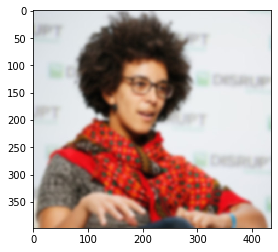

In [1501]:
#1. Load your image of choice.
img = load_img('timnit_blur.jpg')
plt.imshow(img)
plt.show()

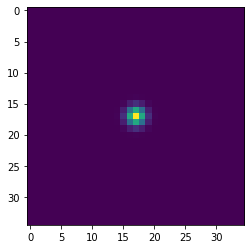

In [1502]:
#2. Create a Gaussian filter here
gf1 = gaussian_filter(35, 1)
plt.imshow(gf1)
plt.show()

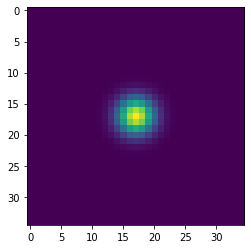

In [1503]:
gf2 = gaussian_filter(35, 2)
plt.imshow(gf2)
plt.show()

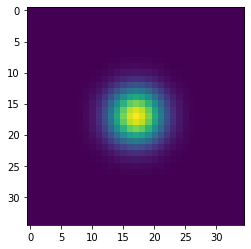

In [1504]:
gf3 = gaussian_filter(35, 3)
plt.imshow(gf3)
plt.show()

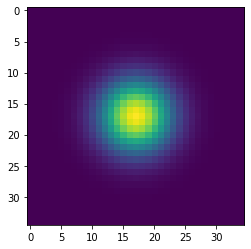

In [1505]:
gf4 = gaussian_filter(35, 4)
plt.imshow(gf4)
plt.show()

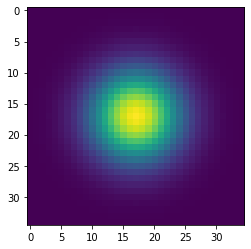

In [1506]:
gf5 = gaussian_filter(35, 5)
plt.imshow(gf5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


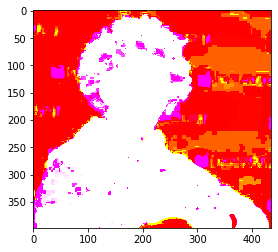

In [1507]:
#3. Next, convert your image to L.a.b. color scale
lab = skimage.color.rgb2lab(img)
plt.imshow(lab)
plt.show()

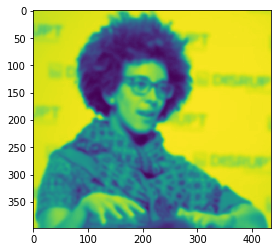

In [1508]:
#4. Extract the first channel to get the intensity-only image. Say this results in L
L = lab[:,:,0]
plt.imshow(L)
plt.show()

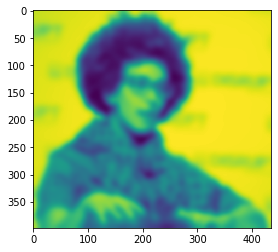

In [1509]:
#5. Convolve this new image L with the filter g to get a smoothed image Simg
Simg = scipy.ndimage.convolve(L, gf5)
plt.imshow(Simg)
plt.show()

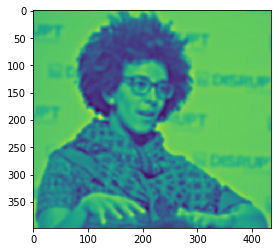

In [1510]:
#6. Create a new image by multiplying L by a small constant r and Simg by another small constant s
r = 0.5
s = 0.3
newL = r*L - s*Simg
plt.imshow(newL)
plt.show()

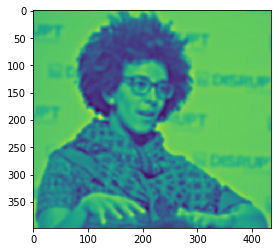

In [1511]:
#7. Normalize your new image so that its values are between 0 and 100
newL *= 100.0/newL.max()
plt.imshow(newL)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


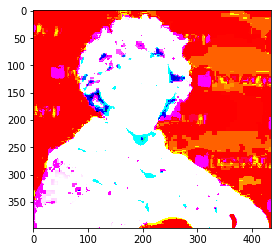

In [1512]:
#8. Recombine this new L image with the previous a and b channels of the lab image in step #3.
a = lab[:,:,1]
b = lab[:,:,2]
lab2 = np.dstack((newL,a,b))
plt.imshow(lab2)
plt.show()

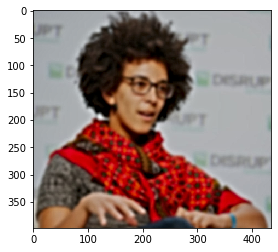

In [1513]:
#9. Reconvert the L.a.b. image back to RGB with the command below (assuming the new L.a.b. image is called lab2)
img2 = skimage.color.lab2rgb(lab2)
plt.imshow(img2)
plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


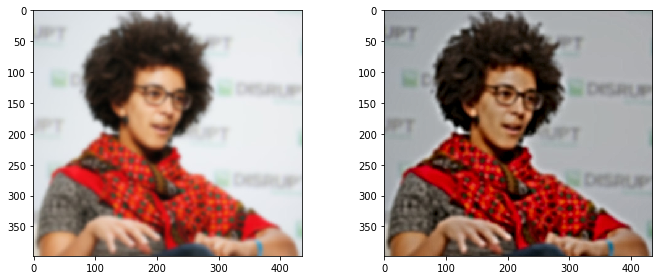

In [1514]:
#10. Examine your newly sharpened image and save it to file. Also display the original and sharpened image side-by-side
imsave('timnit_sharp.jpg',img2)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(img2)
fig.tight_layout()
plt.show()

# Conclusion Part 1

1. The low value of sigma is smoother in comparison to large value of sigma. As in when the sigma value increases, the sharpness of the image also increases.
2. When the difference of r and s is large then the image tends to be more smooth and light.
3. When the diffrence of r and s is small then the image tends to be more sharp and dark.

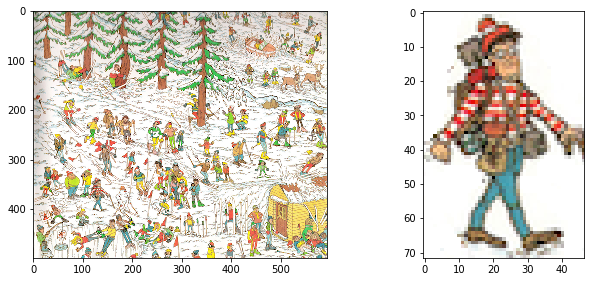

In [1515]:
#1. Load the image and Waldo template
img1 = load_img('waldo_onIce.png')
temp1 = load_img('waldo_template.png')

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

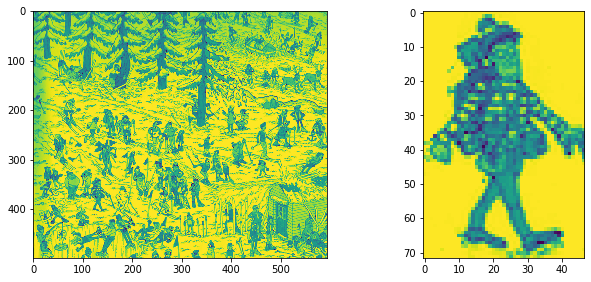

In [1516]:
#Convert the two images to grayscale
img = skimage.color.rgb2gray(img1)
temp = skimage.color.rgb2gray(temp1)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(temp)
fig.tight_layout()
plt.show()

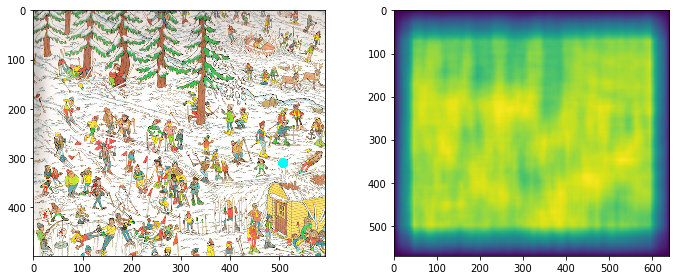

In [1517]:
#2. Write and call a cross-correlation function to find the best match for Waldo
def crosscorr(Img, f):
    return scipy.signal.correlate2d(Img, f)
    
cross_corr = crosscorr(img,temp)
coordinates = np.where(cross_corr == cross_corr.max())
cord_1 = coordinates[0][0]
cord_2 = coordinates[1][0]

temp_dimen_1 , temp_dimen_2 = temp.shape

cord_1 = cord_1 - temp_dimen_1/2
cord_2 = cord_2 - temp_dimen_2/2

#3. Use the helper function 'draw_patch' to place a circular cyan patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the correlation map obtained alongside the image. 
# 
draw_patch(img1, cord_1, cord_2, 10, 2)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(cross_corr)
fig.tight_layout()
plt.show()
    

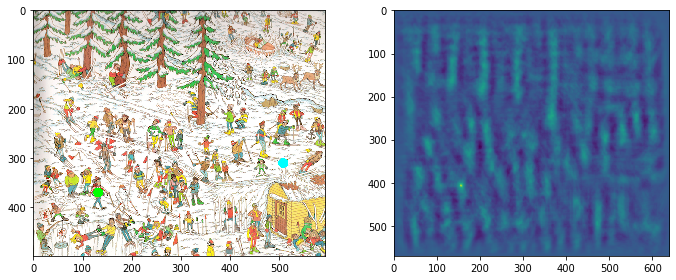

In [1518]:
#4. Write and call a normalized cross-correlation function to find the best match for Waldo
def normcrosscorr(Img, f):
    diff_img = Img - Img.mean()
    norm_img = (diff_img)/(np.sqrt(np.sum(diff_img**2)))
    
    diff_f = f - f.mean()
    norm_f = (diff_f)/(np.sqrt(np.sum(diff_f**2)))
    
    return scipy.signal.correlate2d(norm_img, norm_f)

norm_cross_corr = normcrosscorr(img,temp)
coordinates = np.where(norm_cross_corr == norm_cross_corr.max())
cord_1 = coordinates[0][0]
cord_2 = coordinates[1][0]

temp_dimen_1 , temp_dimen_2 = temp.shape

cord_1 = cord_1 - temp_dimen_1/2
cord_2 = cord_2 - temp_dimen_2/2

#5. Again, use the helper function 'draw_patch' to place a circular green patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the normalized correlation map obtained alongside the image. 
# 
draw_patch(img1, cord_1, cord_2, 10, 3)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(norm_cross_corr)
fig.tight_layout()
plt.show()


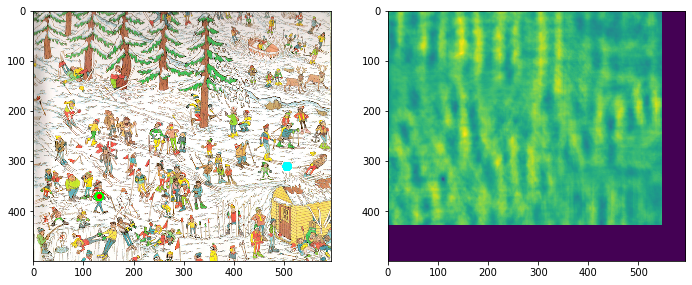

In [1519]:
#6. Write and call an SSD function to find the best match for Waldo

def SSD(Img, f):
    return np.sum((Img-f)**2)

temp_dimen_1, temp_dimen_2 = temp.shape
image_shape1,  image_shape2 = img.shape

def ssd_helper_func(): 
    calc_diff1 = image_shape1 - temp_dimen_1
    calc_diff2 = image_shape2 - temp_dimen_2
    ssd_img = np.zeros(shape=(image_shape1, image_shape2))
    for coun1 in range(calc_diff1):
        for coun2 in range(calc_diff2):
            slice_coun1 = coun1 + temp_dimen_1
            slice_coun2 = coun2 + temp_dimen_2
            slice1 = img[coun1 : slice_coun1, coun2 : slice_coun2]
            ssd_img[coun1][coun2] = SSD(slice1,temp)
            coun2 += 1
        coun1 += 1
        
    coordinates = np.where(ssd_img == ssd_img.min())
    cord_1 = coordinates[0][0]
    cord_2 = coordinates[1][0]
    
    cord_1 = cord_1 - temp_dimen_1/2
    cord_2 = cord_2 - temp_dimen_2/2

ssd_helper_func()

#7. Lastly, use the helper function 'draw_patch' to place a circular red patch on 
# the presumed location of Waldo on the original image. Also, display the 
# image of the SSD map obtained alongside the image. 
# 
draw_patch(img1, cord_1, cord_2, 5, 1)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(ssd_img)
fig.tight_layout()
plt.show()

# Conclusion Part 2

1. For the cross-correlation, I have used scipy library to find cross correlation between the original image 'I' and Waldo template 'f' and then found max of cross correlated value. The cyan colored patch is drawn in the original image and cross correlation map is shown side by side.
2. For the normalized cross-correlation, I have calculated the normalized version of the orginal image to find best match from Waldo template. In the orginal image, after normalization, the green color path has detected the waldo and in the normalized ceoss-correlation map, the highlighted green color point is where the waldo is in the image.
3. For the Sum of Squared Differences (SSD), I have calculted the ssd and through sliding template to the original image, we find the best match. In the original image, the red patch shows the position of waldo via SSD and in the SSD map, the black point is the position for Waldo. 



# PART 3 - Canny Edge Detection

Yes, I have read the article provided which is "Canny Edge Detection Step by Step in Python - Computer Vision". The article describes about Canny Edge Detector.  Also, it elaborately explained about canny edge detector algorithm steps which are Noise reduction, Gradient calculation, Non-maximum suppression, Double threshold and Edge tracking by Hysteresis. 